In [2]:
from umap import UMAP
import umap.plot

import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

/home/cat/mambaforge/envs/tangle/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
clip_alstro = dict(img_embeds=np.load("../coco_train2017_image_embeds.npy"),
                  text_embeds=np.load("../coco_train2017_text_embeds.npy"))

clip_vit_b_32 = dict(img_embeds=np.load("../coco-embeds-ViT-B-32/img_emb/img_emb_0.npy"),
                     text_embeds=np.load("../coco-embeds-ViT-B-32/text_emb/text_emb_0.npy"))

clip_vit_b_16 = dict(img_embeds=np.load("../coco-embeds-ViT-B-16/img_emb/img_emb_0.npy"),
                     text_embeds=np.load("../coco-embeds-ViT-B-16/text_emb/text_emb_0.npy"))

clip_vit_l_14 = dict(img_embeds=np.load("../coco-embeds-ViT-L-14/img_emb/img_emb_0.npy"),
                     text_embeds=np.load("../coco-embeds-ViT-L-14/text_emb/text_emb_0.npy"))

cloob_vit_b_16 = dict(img_embeds=np.load("../cloob-vit-b-16/cloob_laion_400m_vit_b_16_32_epochs_coco_train2017_image_embeds.npy"),
                      text_embeds=np.load("../cloob-vit-b-16/cloob_laion_400m_vit_b_16_32_epochs_coco_train2017_text_embeds.npy"))

ml_jku_cloob_infoNCE = dict(img_embeds=np.load("../ml_jku_cloob_embeddings/cloob_infoNCE_rn50_cc_epoch_128_image_embeds.npy"),
                            text_embeds=np.load("../ml_jku_cloob_embeddings/cloob_infoNCE_rn50_cc_epoch_128_text_embeds.npy"))

ml_jku_clip_rn50 = dict(img_embeds=np.load("../ml_jku_cloob_embeddings/clip30_rn50_cc_epoch_128_image_embeds.npy"),
                        text_embeds=np.load("../ml_jku_cloob_embeddings/clip30_rn50_cc_epoch_128_text_embeds.npy"))

ml_jku_clip_infoLOOB = dict(img_embeds=np.load("../ml_jku_cloob_embeddings/clip_infoLOOB_rn50_cc_epoch_128_image_embeds.npy"),
                            text_embeds=np.load("../ml_jku_cloob_embeddings/clip_infoLOOB_rn50_cc_epoch_128_text_embeds.npy"))

ml_jku_cloob_rn50 = dict(img_embeds=np.load("../ml_jku_cloob_embeddings/cloob_rn50_cc_epoch_128_image_embeds.npy"),
                         text_embeds=np.load("../ml_jku_cloob_embeddings/cloob_rn50_cc_epoch_128_text_embeds.npy"))


In [18]:
def pca_and_umap(img_embeds, text_embeds, subset_n=5000, pca_to=256):
    
    all_embs = np.concatenate([img_embeds[:subset_n], 
                               text_embeds[:subset_n]], 
                              axis=0)
    
    pca = PCA(n_components=pca_to).fit_transform(all_embs)
    labels = subset_n * ["img"] + subset_n * ["text"]
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 3))
    for i, dims in enumerate(range(0, 6, 2)):
        axes[i].scatter(pca[:subset_n, dims], pca[:subset_n, dims+1], label="img", s=0.1)
        axes[i].scatter(pca[subset_n:, dims], pca[subset_n:, dims+1], label="text", s=0.1)
    axes[i].legend()
    plt.show()
    

    umaped = UMAP(n_components=2).fit(pca)
    
    umap.plot.points(umaped, labels=np.array(labels))
    dists = np.linalg.norm(umaped.embedding_[:subset_n] - umaped.embedding_[subset_n:], 
                           axis=-1)
    print(f"dist in umap space mean: {dists.mean():.2f} std: {dists.std():.2f}")

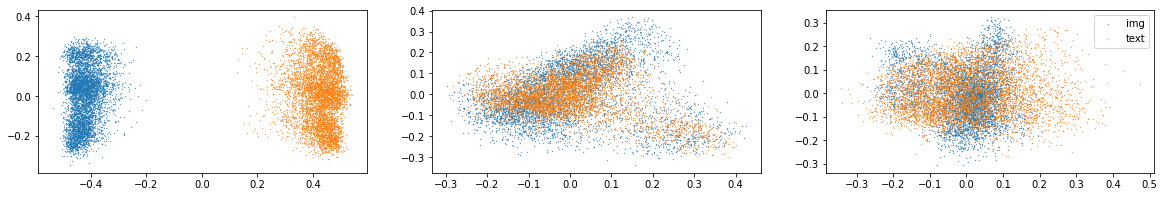

dist in umap space mean: 17.50 std: 3.11


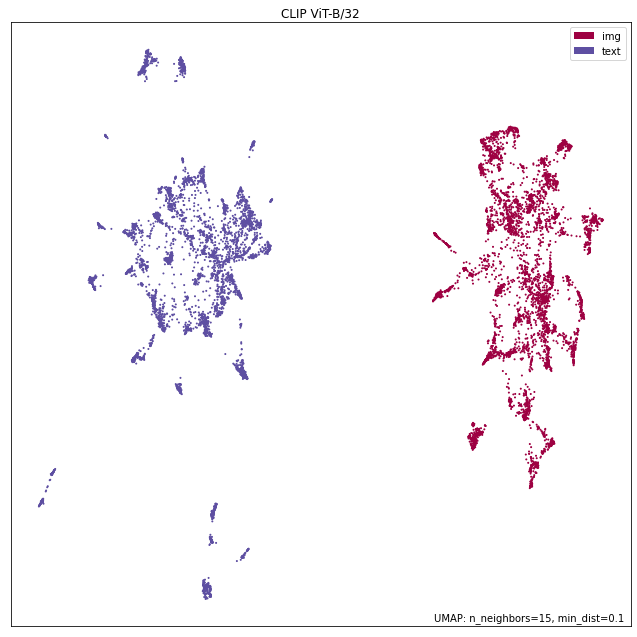

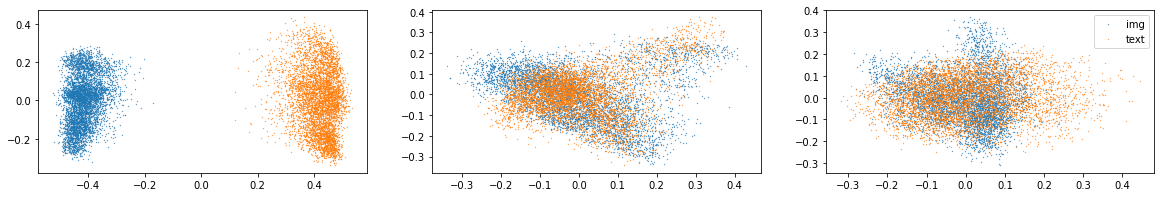

dist in umap space mean: 18.57 std: 3.12


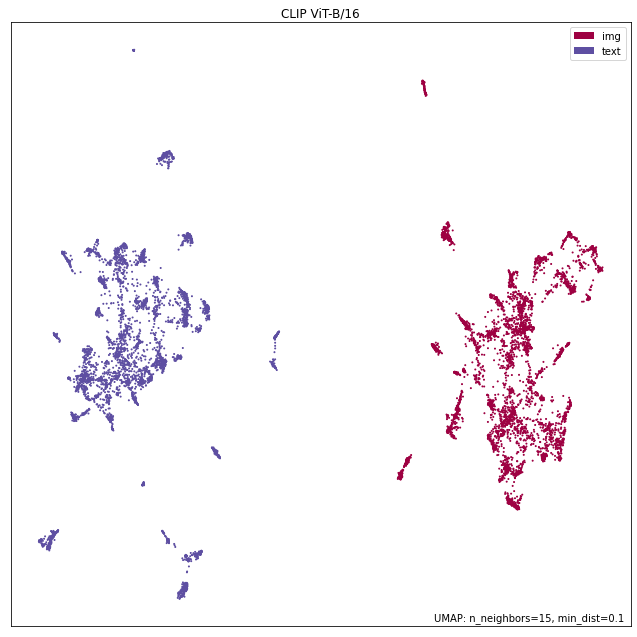

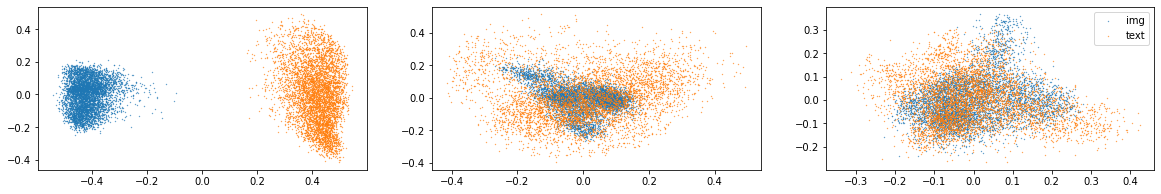

dist in umap space mean: 17.14 std: 3.50


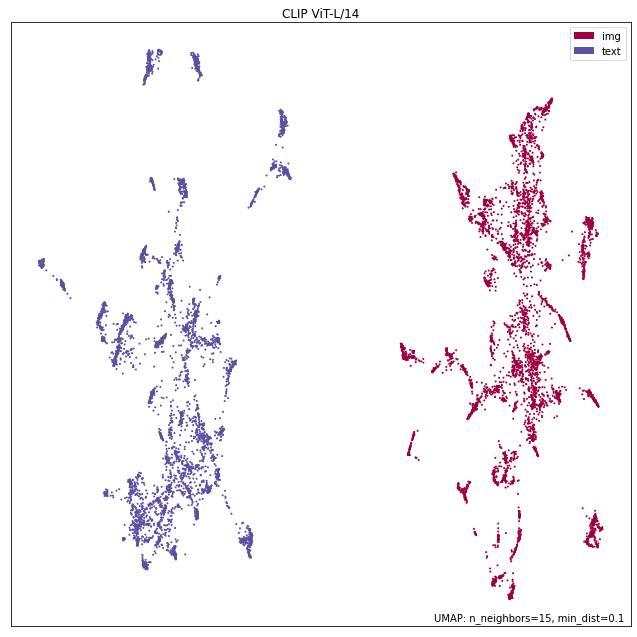

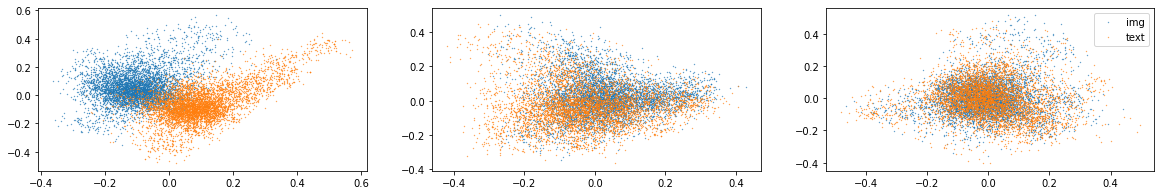

dist in umap space mean: 0.75 std: 1.45


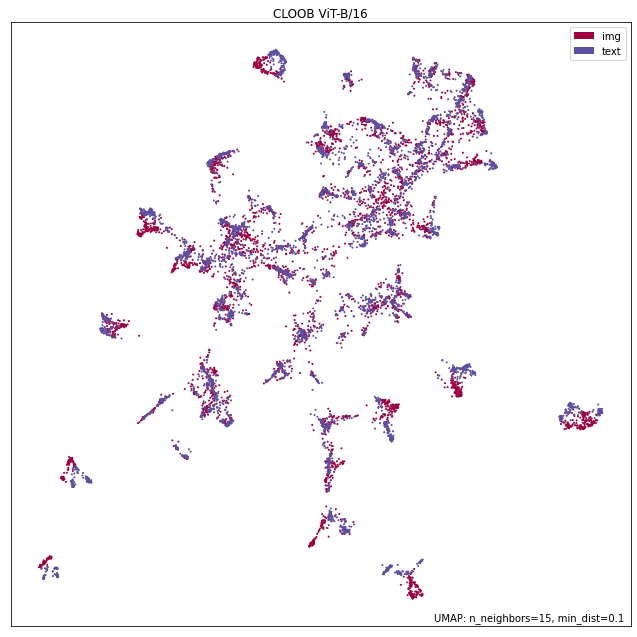

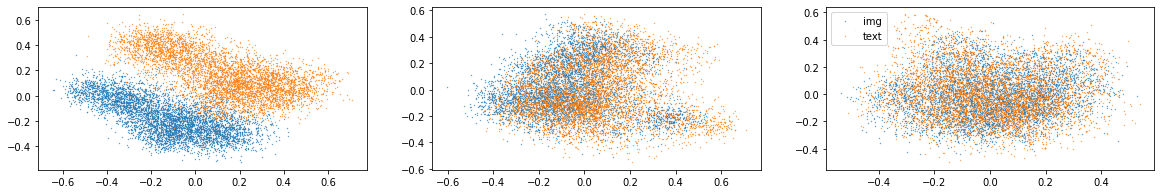

dist in umap space mean: 2.30 std: 2.06


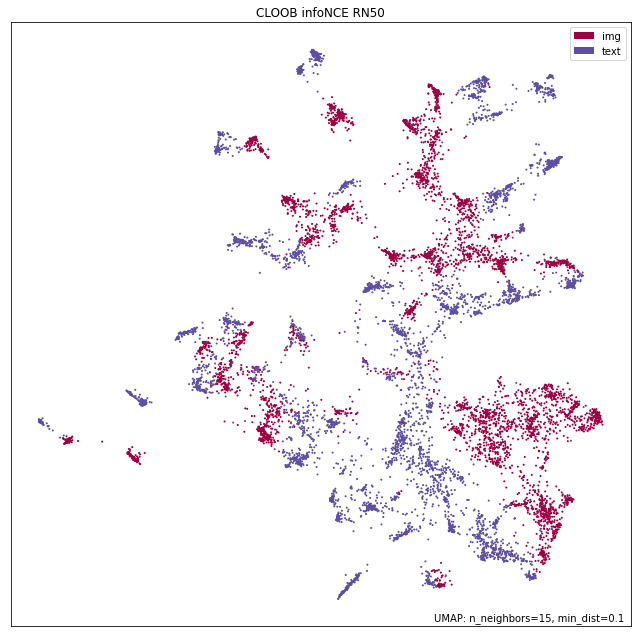

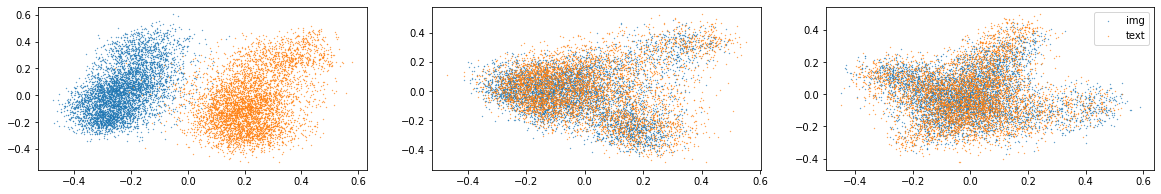

dist in umap space mean: 5.75 std: 2.88


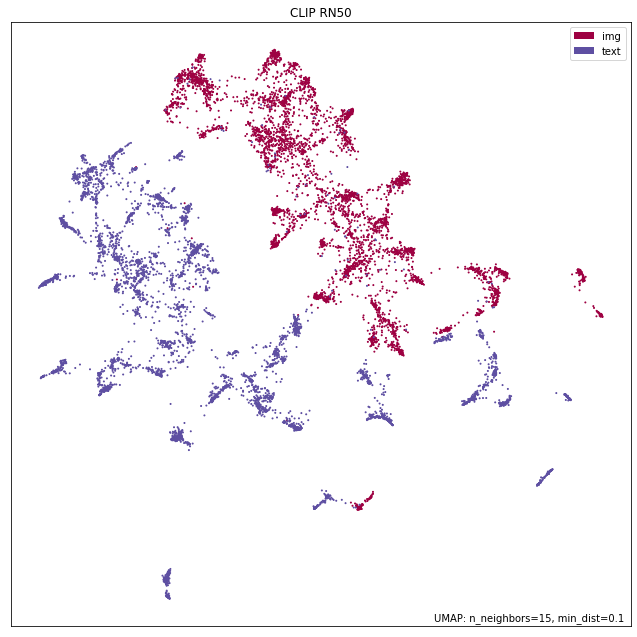

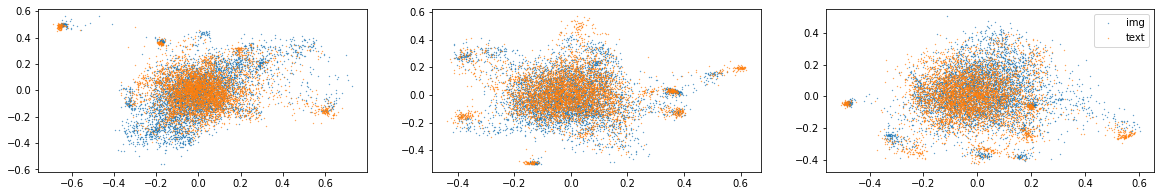

dist in umap space mean: 1.80 std: 3.32


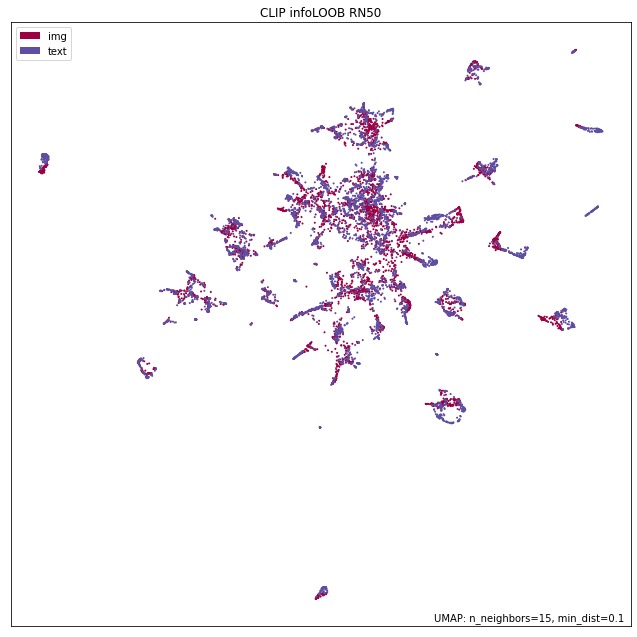

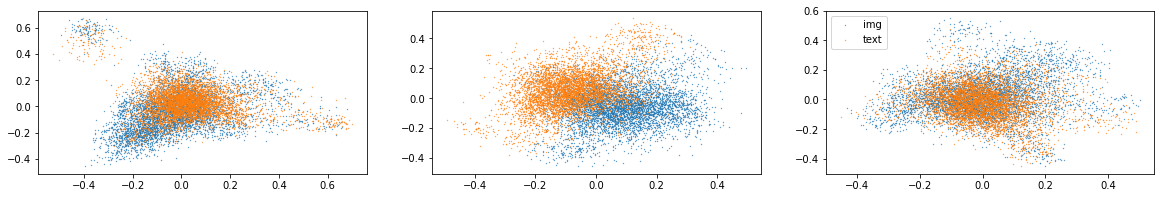

dist in umap space mean: 1.11 std: 1.82


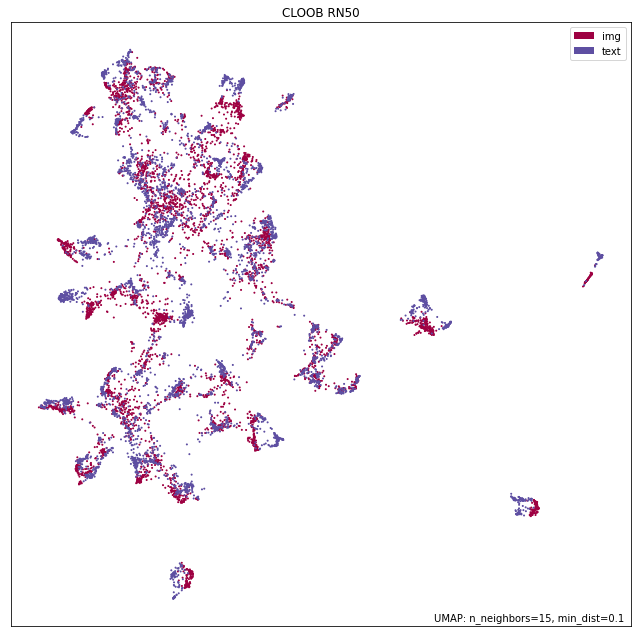

In [20]:
for embeds, name in [(clip_vit_b_32, "CLIP ViT-B/32"),
                     (clip_vit_b_16, "CLIP ViT-B/16"),
                     (clip_vit_l_14, "CLIP ViT-L/14"),
                     (cloob_vit_b_16, "CLOOB ViT-B/16"),
                     (ml_jku_cloob_infoNCE, "CLOOB infoNCE RN50"),
                     (ml_jku_clip_rn50, "CLIP RN50"),
                     (ml_jku_clip_infoLOOB, "CLIP infoLOOB RN50"),
                     (ml_jku_cloob_rn50, "CLOOB RN50")]:
    pca_and_umap(**embeds)
    plt.gca().set(title=name)